# Median calculation

Calculate median compensation for different disciplines via the Stack Overflow Developer Survey from 2019

In [19]:
import sqlite3

import matplotlib
import pandas

%matplotlib inline

In [20]:
conn = sqlite3.connect('source_data.sqlite')

In [21]:
respondent_comp = pandas.read_sql(
    '''
    SELECT
        devType AS devType,
        sum(compensation + 0.0) / count(1) AS compensation,
        respondentId
    FROM
        source_data
    GROUP BY
        respondentId
    ''',
    conn
)

In [22]:
median_values = respondent_comp.groupby('devType').median()

In [23]:
median_values.to_csv('dev_type_comp.csv')

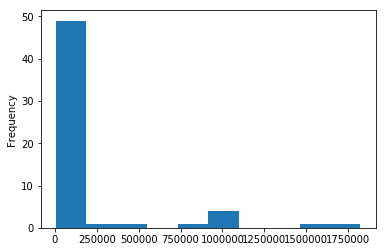

In [24]:
respondent_comp[respondent_comp['devType'] == 'Educator']['compensation'].plot.hist()

In [25]:
pandas.read_sql(
    '''
    SELECT
        count(1)
    FROM
        (
            SELECT
                devType AS devType,
                sum(compensation + 0.0) / count(1) AS compensation,
                min(compensation + 0.0) AS compensationMin,
                max(compensation + 0.0) AS compensationMax,
                respondentId
            FROM
                source_data
            GROUP BY
                respondentId
        ) comp_check
    WHERE
        comp_check.compensation != compensationMin
        OR comp_check.compensation != compensationMax
        OR comp_check.compensationMin != compensationMin
    ''',
    conn
)

,count(1)
0,0
